# Assignment 2 – SVM and kNN
## Part 1: SVM algoritmi harjoittelu ja testaus

Ryhmän jäsenet:
Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

Vastuut:

**Niina** - Confusion matrix + SVM vs kNN vertailu

**Jyri** - Datasetin valinta, esikäsittely, SMV käyttötarkoitukset

**Anniina** - SVM-malli ja skaalaus

### 1.1 Datasetti & SVM. soveltuvuus
Datasetin kuvaus:
Datasetti on tippaus -käyttäytymistä käsittelevästä tutkimuksesta. Sen tarkoituksena on selittää miten erilaiset tekijät, kuten esim. asiakkaan sukupuoli, tupakointitapa, viikonpäivä, kellonaika, seurueen koko ja laskun suuruus vaikutta asiakkaiden antaman tipin määrään.

Yritämme datasetillä ennustaa, milloin asiakas päätyy antamaan suuren tai pienen tipin.

Datasetissä on 244 havaintoa ja seuraavat ominaisuudet:

- total_bill: Ravintolalaskun kokonaissumma (tyypillisesti 3–50 USD).
- tip: Asiakkaan antama tippi (yleensä 1–10 USD).
- sex: Tarjoilijan tai asiakkaan sukupuoli (Male/Female).
- smoker: Onko asiakas tupakoiva (Yes/No).
- day: Viikonpäivä (Thu, Fri, Sat, Sun).
- time: Aterian ajankohta (Lunch/Dinner).
- size: Seurueen koko (1–6 henkilöä).

Sillä datasetissä ei ollut valmiiksi luokkamuuttujaa, teemme luokkamuuttujan tippien suuruudesta : tip_class (pieni/keskikokoinen tippi <=3, suuri tippi >= 4)

In [73]:
import pandas as pd
df = pd.read_csv("tips.csv")

def classify_tip(tip):
    if tip <= 3:
        return 0
    else:
        return 1

df["tip_class"] = df["tip"].apply(classify_tip)

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,total_bill,tip,size,tip_class,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,False,False,False,True,False,False
1,10.34,1.66,3,0,True,False,False,True,False,False
2,21.01,3.50,3,1,True,False,False,True,False,False
3,23.68,3.31,2,1,True,False,False,True,False,False
4,24.59,3.61,4,1,False,False,False,True,False,False


### 1.2 SVM Käyttö



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_encoded.drop("tip_class", axis=1)
y = df_encoded["tip_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8367346938775511

### Visualisointi

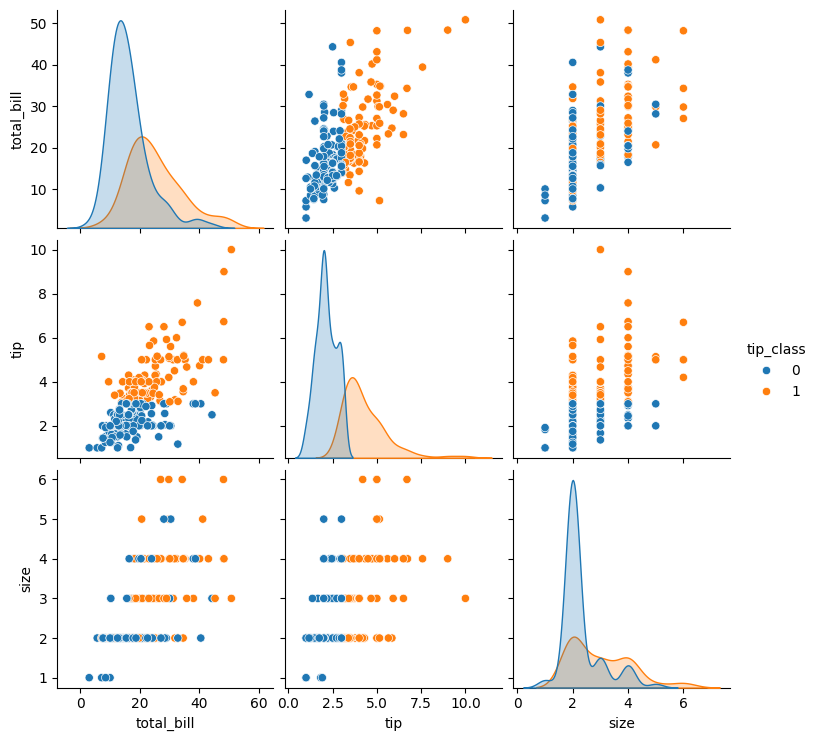

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['total_bill', 'tip', 'size']

sns.pairplot(df_encoded, vars=cols, hue="tip_class")
plt.show()

### 1.3 Käyttötarkoituksia SVM- algoritmille

**Esimerkki 1:  Taloudellisten petoksien havaitseminen**

- SVM -algorytmiä voidaan käyttää maksutapahtumien luokittelemiseen joko normaaliksi tai poikkeavaksi.



**Esimerkki 2: Allekirjoitusten tunnistaminen**

- SVM -algoritmia voidaan käyttää allekirjoituksien tunnistamisessa, varmistaakseen käsin kirjoitettujen allekirjoitusten aitouden ja tarkuuden.

## Part 2: SVM -kokeilua

### 2.1 Vertailu StandardScaler malleilla sekä ilman sitä


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_no_scaler = SVC()
model_no_scaler.fit(X_train, y_train)
pred_no_scaler = model_no_scaler.predict(X_test)
acc_no_scaler = accuracy_score(y_test, pred_no_scaler)

model_scaler = make_pipeline(StandardScaler(), SVC())
model_scaler.fit(X_train, y_train)
pred_scaler = model_scaler.predict(X_test)
acc_scaler = accuracy_score(y_test, pred_scaler)

print("Tarkkuus ilman skaalausta :",acc_no_scaler), print("Tarkkuus skaalauksella :",acc_scaler)

Tarkkuus ilman skaalausta : 0.8367346938775511
Tarkkuus skaalauksella : 0.9591836734693877


(None, None)

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = pd.concat([
    pd.DataFrame(X_train_scaled, columns=X_train.columns),
    pd.DataFrame(X_test_scaled, columns=X_test.columns)
], ignore_index=True)

y_combined = pd.concat([y_train, y_test], ignore_index=True)
X_scaled["tip_class"] = y_combined

df_encoded_scaled = X_scaled
df_encoded_scaled

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,tip_class
0,0.732409,0.098499,1.487900,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
1,1.368275,1.469410,-0.622213,0.690849,1.307032,-0.740013,-0.674703,1.658312,1.615893,1
2,-0.253182,-0.718214,-0.622213,0.690849,1.307032,-0.740013,1.482134,-0.603023,-0.618853,0
3,0.031861,0.783955,-0.622213,0.690849,1.307032,1.351328,-0.674703,-0.603023,-0.618853,1
4,3.066474,1.469410,3.598013,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
...,...,...,...,...,...,...,...,...,...,...
239,-0.815595,-0.550496,-0.622213,-1.447494,1.307032,1.351328,-0.674703,-0.603023,-0.618853,0
240,-0.354044,0.375598,0.432844,-1.447494,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
241,-0.214811,0.565192,-0.622213,0.690849,-0.765092,1.351328,-0.674703,-0.603023,-0.618853,1
242,0.151360,0.681866,-0.622213,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1


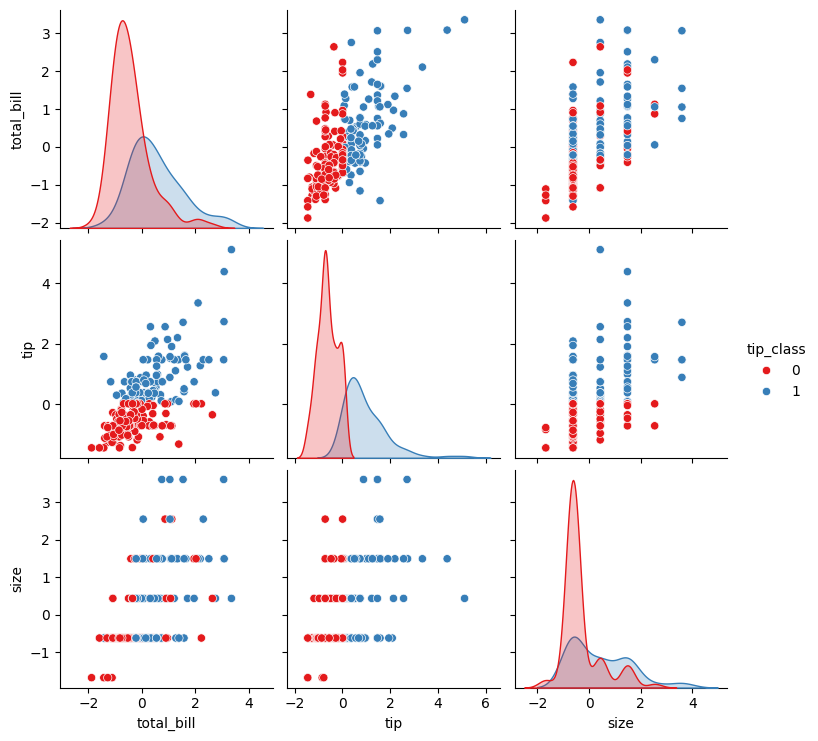

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['total_bill', 'tip', 'size']

sns.pairplot(df_encoded_scaled, vars=cols, hue='tip_class', palette='Set1')


### 2.1. Erojen tulkinta

Skaalattu SVM -malli antaa paremman tarkkuuden kuin skaalaamaton malli sekä suoritus on parempi. 
Ilman skaalaamista, muuttujat voivat vääristyä koska niillä on eri yksiköitä esim. desimaali (total_bill) ja kokonaisluku (size)


### 2.2 Confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_scaler)

array([[29,  1],
       [ 1, 18]])

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_scaler))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.95      0.95      0.95        19

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



### 2.2. Confusion matrix tulosten tulkinta

Malli on luokitellut hyvin ja tarkasti tuloksia. 
- Luokka 0 (pieni/keskikokeinen tippi) on saatu ennustettua hieman tarkemmin kuin luokka 1 (suuri tippi)
- Tarkkuus on yleisesti hyvä ja malli luokittelee harvoin väärin
- Malli teki vain kaksi virheellistä luokitusta

### 2.3 SVM vertaus kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

accuracy_score(y_test, y_knn)

0.8163265306122449

### 2.3. SVM vertaus kNN Tulkinta
kNN -mallin tarkkuus on n. 82% kun SVM -mallin tarkkuus on n. 96%.
- Tämän datasetin käsittelyssä SVM -malli on parempi sekä tarkempi kun kNN -malli